<a href="https://colab.research.google.com/github/sousagomide/stable_diffusion/blob/main/secao02_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação

In [ ]:
!nvidia-smi

In [ ]:
!pip install diffusers==0.11.1
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4', torch_dtype=torch.float16)

In [ ]:
pipe.safety_checker = lambda images, clip_input: (images, False)

In [ ]:
pipe = pipe.to('cuda')

In [ ]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

# Prompts
Sites para criação de prompts:

*   https://lexica.art/
*   https://civitai.com/
*   https://www.mage.space/explore
*   https://publicprompts.art/
*   https://playgroundai.com/
*   https://stablediffusion.fr/prompts
*   https://github.com/Dalabad/stable-diffusion-prompt-templates

In [ ]:
prompt = 'an apple' #Gerar uma maçã

In [ ]:
img = pipe(prompt).images[0]

In [ ]:
type(img)

In [ ]:
img

In [ ]:
prompt = 'photograph of an apple' # Fotografia de uma maçã
img = pipe(prompt).images[0]
img

In [ ]:
img.save('resultado.png') # Salva a imagem em um arquivo

In [ ]:
prompt = 'a photograph of an astronaut riding a horse, color'
#prompt = 'a photograph of an naked top model, color'
img = pipe(prompt).images[0]
img

# Gerando vários resultados

In [ ]:
from PIL import Image # Biblioteca para gerar imagens

def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols
  w, h = imgs[0].size
  w, h = int(w * scale), int(h * scale)
  grid = Image.new('RGB', size = (cols * w, rows * h))
  grid_w, grid_h = grid.size
  for i, img in enumerate(imgs):
    img = img.resize((w, h), Image.ANTIALIAS)
    grid.paste(img, box=(i % cols * w, i // cols * h)) # Questão de redimensionamento
  return grid

In [ ]:
num_imgs = 3
prompt = 'photograph of an old car'
imgs = pipe(prompt, num_images_per_prompt=num_imgs).images
grid = grid_img(imgs, rows=3, cols=1, scale=1)
grid

# Parâmetros

*   Seed

In [ ]:
prompt = 'photograph of an old car'
seed = 777
generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, generator=generator).images[0]
img

In [ ]:
prompt = 'van gogh painting of an old car'
seed = 666
generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, generator=generator).images[0]
img

*  Inference Steps

In [ ]:
seed = 666
prompt = 'a photograph of an astronaut riding a horse'
generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, num_inference_steps=50, generator=generator).images[0]
img

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
seed = 777
prompt = 'a photograph of an astronaut riding a horse'
for i in range(1, 6):
  n_steps = i * 10
  generator = torch.Generator('cuda').manual_seed(seed)
  img = pipe(prompt, num_inference_steps=n_steps, generator=generator).images[0]
  plt.subplot(1, 5, i)
  plt.title('num_inference_steps: {}'.format(n_steps))
  plt.imshow(img)
  plt.axis('off')
plt.show()

* Classifier-free guidance (CFG)

In [ ]:
seed = 777
prompt = 'a photograph of an astronaut riding a horse'
generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, guidance_scale=10, generator=generator).images[0]
img

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
seed = 777
prompt = 'a photograph of an astronaut riding a horse'
for i in range(1, 6):
  n_guidance = i + 4
  generator = torch.Generator('cuda').manual_seed(seed)
  img = pipe(prompt, guidance_scale=n_guidance, generator=generator).images[0]
  plt.subplot(1, 5, i)
  plt.title('guidance_scale: {}'.format(n_guidance))
  plt.imshow(img)
  plt.axis('off')
plt.show()

* Tamanho da imagem

In [ ]:
seed = 777
prompt = 'photograph of a beach landscape during sunset, stars in the sky'
generator = torch.Generator('cuda').manual_seed(seed)
h, w = 512, 768
img = pipe(prompt, height=h, width=w, generator=generator).images[0]
img

In [ ]:
seed = 777
prompt = 'photograph of a beach landscape during sunset, stars in the sky'
generator = torch.Generator('cuda').manual_seed(seed)
h, w = 768, 512
img = pipe(prompt, height=h, width=w, generator=generator).images[0]
img

# Prompts Negativos

Flags:
* ugly: corrige a imagem gerada
* deformed: corrige possíveis deformações
* disfigured: corrige a desfiguração de rosto

In [ ]:
num_images = 3
prompt = 'photograph of an old car'
neg_prompt = 'bw photo' # bw = black and white
imgs = pipe(prompt, negative_prompt=neg_prompt,  num_images_per_prompt=num_images).images
grid = grid_img(imgs, rows=1, cols=3, scale=0.75)
grid

# Outros Modelos

* SD v1.5

In [ ]:
sd15 = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5', torch_dtype=torch.float16)
sd15.safety_checker = lambda images, clip_input: (images, False)
sd15 = sd15.to('cuda')
sd15.enable_attention_slicing()
sd15.enable_xformers_memory_efficient_attention()

In [ ]:
num_images = 3
prompt = 'photograph of an old car'
neg_prompt = 'front angle, bw photo'
imgs = sd15(prompt, negative_prompt=neg_prompt,  num_images_per_prompt=num_images).images
grid = grid_img(imgs, rows=1, cols=3, scale=0.75)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

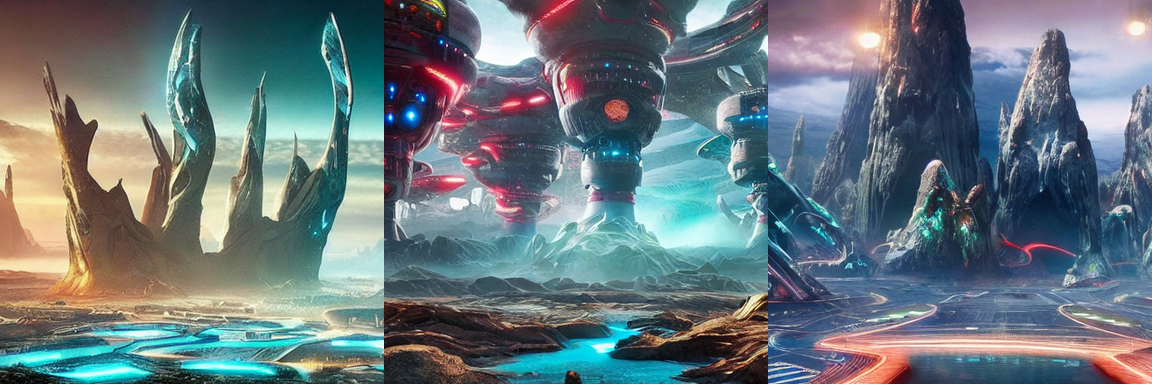

In [47]:
num_images = 3
prompt = 'photo of a futuristic city on another planet, realistic, full hd'
neg_prompt = 'buildings'
imgs = sd15(prompt, negative_prompt=neg_prompt, num_images_per_prompt=num_images).images
grid = grid_img(imgs, rows=1, cols=3, scale=0.75)
grid

* SD v2.0

In [ ]:
sd2 = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1', torch_dtype=torch.float16)
sd2.safety_checker = lambda images, clip_input: (images, False)
sd2 = sd15.to('cuda')
sd2.enable_attention_slicing()
sd2.enable_xformers_memory_efficient_attention()

  0%|          | 0/50 [00:00<?, ?it/s]

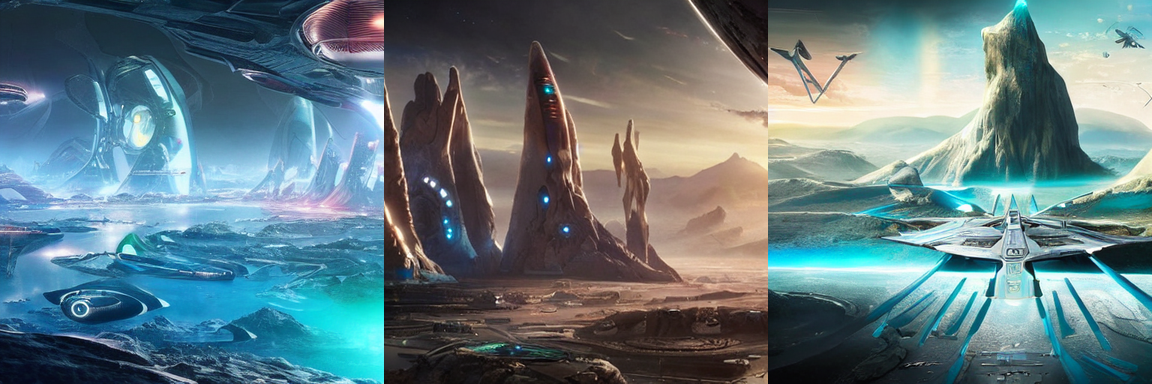

In [48]:
num_images = 3
prompt = 'photo of a futuristic city on another planet, realistic, full hd'
neg_prompt = 'buildings'
imgs = sd2(prompt, negative_prompt=neg_prompt, num_images_per_prompt=num_images).images
grid = grid_img(imgs, rows=1, cols=3, scale=0.75)
grid